# Importing Libraries

In [1]:
# Data analysis and data manipulating tool
import numpy as np    

# Package for linear algebra and multidimensional arrays
import pandas as pd   

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload files from local system to google colab
from google.colab import files
uploaded = files.upload()

Saving Train_data.csv to Train_data.csv
Saving Test_data.csv to Test_data.csv


# Load the Dataset

In [55]:
# Import training data as pandas dataframe and reading it
train = pd.read_csv("Train_data.csv")

# Check for no. of rows and columns
print("Dimensions of Array:" , train.shape)

#  print first five rows in the dataframe
train.head()

Dimensions of Array: (3102, 18)


,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


In [56]:
# Add a new column to the dataframe (data_file) and add constant value (train) to all rows
train['source'] = 'train'

# Check the Dimensions after adding a column
print(train.shape)

# Display first five rows in the dataframe
train.head()

(3102, 19)


,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance,source
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0,train
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1,train
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1,train
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1,train
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1,train


In [57]:
# Import test data as pandas dataframe and reading it
test = pd.read_csv("Test_data.csv")

# Check for no. of rows and columns
print("Dimensions of Array:" , test.shape)

# Print first 5 rows of test_data
test.head()

Dimensions of Array: (935, 17)


,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31


# Exploratory Data Analysis (EDA)

In [58]:
# Add a new column to the dataframe (data_file) and add constant value (test) to all rows similar to train data
test['source'] = 'test'

# Check the Dimensions after adding a column
print(test.shape)

# Display first five rows in the dataframe
test.head()

(935, 18)


,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,source
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56,test
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40,test
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56,test
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54,test
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31,test


In [59]:
# Storing the target variable - car_insurance separately
target_train = train[['car_insurance']]
target_train

,car_insurance
0,0
1,1
2,1
3,1
4,1
...,...
3097,0
3098,0
3099,1
3100,1


In [60]:
# Dropping the target variable from the train df for further analysis and merging and maintan consistency
train.drop(['car_insurance'],axis=1, inplace =True)     # axis = 1 refers to column wise and inplace refers to making changes in the dataframe
print(train.shape)
train.head()

(3102, 18)


,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,source
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,train
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,train
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,train
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,train
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,train


In [61]:
# Merging both training and testing data for further cleaning
new_train_test = pd.concat([train,test],ignore_index=True)    # ignoring their previous indexes and assigning new indices from 0 to n-1
print(new_train_test.shape)
new_train_test.tail()

(4037, 18)


,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,source
4032,31.0,blue-collar,married,secondary,0,152.0,1,1,cellular,8,jul,1,-1,0,NaN,16:28:02,16:41:53,test
4033,30.0,technician,single,secondary,0,53.0,1,0,cellular,18,jul,5,-1,0,NaN,15:31:18,15:37:10,test
4034,42.0,management,married,tertiary,0,36.0,0,0,cellular,21,nov,3,-1,0,NaN,11:38:43,11:49:47,test
4035,46.0,services,married,secondary,0,2948.0,0,0,cellular,21,nov,1,-1,0,NaN,13:17:55,13:32:48,test
4036,54.0,blue-collar,married,secondary,0,548.0,0,0,cellular,18,aug,7,-1,0,NaN,17:59:12,18:07:52,test


In [62]:
# Summarising the dataframe
new_train_test.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts
count,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000
mean,41.189274,0.013129,1574.694994,0.459995,0.117414,15.330196,2.386426,52.065891,0.790686
std,11.504905,0.113839,3550.250707,0.498459,0.321953,8.165424,2.696728,107.666216,2.166401
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,0.000000,121.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,0.000000,594.000000,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000
75%,49.000000,0.000000,1737.000000,1.000000,0.000000,21.000000,3.000000,68.000000,1.000000
max,95.000000,1.000000,98417.000000,1.000000,1.000000,31.000000,43.000000,854.000000,58.000000


In [63]:
new_train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4037 non-null   float64
 1   job_type             4021 non-null   object 
 2   marital_status       4037 non-null   object 
 3   education_level      3890 non-null   object 
 4   default_or_not       4037 non-null   int64  
 5   balance_amt          4037 non-null   float64
 6   household_insurance  4037 non-null   int64  
 7   car_loan             4037 non-null   int64  
 8   communication        3329 non-null   object 
 9   last_contact_day     4037 non-null   int64  
 10  last_contact_month   4037 non-null   object 
 11  no_of_contacts       4037 non-null   int64  
 12  days_passed          4037 non-null   int64  
 13  prev_attempts        4037 non-null   int64  
 14  Outcome              991 non-null    object 
 15  call_start           4037 non-null   o

In [64]:
# To get no. of missing data in each column
miss_data = new_train_test.isnull().sum()
print(miss_data,'\n')
miss_data = miss_data[miss_data>0]
print(miss_data,'\n')
# Missing data by percentage
miss_data_percentage = miss_data/len(new_train_test)*100
print(miss_data_percentage)

age                       0
job_type                 16
marital_status            0
education_level         147
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           708
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                3046
call_start                0
call_end                  0
source                    0
dtype: int64 

job_type             16
education_level     147
communication       708
Outcome            3046
dtype: int64 

job_type            0.396334
education_level     3.641318
communication      17.537776
Outcome            75.452068
dtype: float64


In [65]:
# Missing value treatment

# Deleting the entire "Outcome" column since it has too many missing values, more than 75% and will not contribute accurately towards the final prediction
new_train_test.drop(['Outcome'], axis=1, inplace=True)
new_train_test.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,source
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,10:22:20,10:24:29,train
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,train
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,13:18:41,13:27:16,train
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,10:09:18,10:21:48,train
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,train


In [66]:
# getting all the categorical columns
cat_cols = new_train_test.select_dtypes(include = 'object').columns     
cat_cols

Index(['job_type', 'marital_status', 'education_level', 'communication',
       'last_contact_month', 'call_start', 'call_end', 'source'],
      dtype='object')

In [67]:
# Importing SimpleImputer from sklearn - this will be used to impute data in the cells with missing values
from sklearn.impute import SimpleImputer

# missing values - categorical - impute with mode (most frequent)
for i in cat_cols:
  mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
  mode_imputer = mode_imputer.fit(new_train_test[[i]])
  new_train_test[i] = mode_imputer.transform(new_train_test[[i]]).ravel()
  
new_train_test.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,source
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,10:22:20,10:24:29,train
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,09:06:30,13:59:48,train
2,36.000000,services,single,secondary,0,281.000000,1,0,cellular,16,may,1,-1,0,13:18:41,13:27:16,train
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,10:09:18,10:21:48,train
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,12:12:30,12:27:14,train


In [68]:
new_train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4037 non-null   float64
 1   job_type             4037 non-null   object 
 2   marital_status       4037 non-null   object 
 3   education_level      4037 non-null   object 
 4   default_or_not       4037 non-null   int64  
 5   balance_amt          4037 non-null   float64
 6   household_insurance  4037 non-null   int64  
 7   car_loan             4037 non-null   int64  
 8   communication        4037 non-null   object 
 9   last_contact_day     4037 non-null   int64  
 10  last_contact_month   4037 non-null   object 
 11  no_of_contacts       4037 non-null   int64  
 12  days_passed          4037 non-null   int64  
 13  prev_attempts        4037 non-null   int64  
 14  call_start           4037 non-null   object 
 15  call_end             4037 non-null   o

In [69]:
# As mentioned -1 in column days_passed are missing values
new_train_test['days_passed'].value_counts()
# Dropping the days_passed column since too many missing values - almost 70%
del new_train_test['days_passed']
new_train_test.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,prev_attempts,call_start,call_end,source
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,0,10:22:20,10:24:29,train
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,1,09:06:30,13:59:48,train
2,36.000000,services,single,secondary,0,281.000000,1,0,cellular,16,may,1,0,13:18:41,13:27:16,train
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,0,10:09:18,10:21:48,train
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,4,12:12:30,12:27:14,train


In [70]:
new_train_test.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,prev_attempts
count,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000
mean,41.189274,0.013129,1574.694994,0.459995,0.117414,15.330196,2.386426,0.790686
std,11.504905,0.113839,3550.250707,0.498459,0.321953,8.165424,2.696728,2.166401
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,0.000000,121.000000,0.000000,0.000000,8.000000,1.000000,0.000000
50%,39.000000,0.000000,594.000000,0.000000,0.000000,15.000000,2.000000,0.000000
75%,49.000000,0.000000,1737.000000,1.000000,0.000000,21.000000,3.000000,1.000000
max,95.000000,1.000000,98417.000000,1.000000,1.000000,31.000000,43.000000,58.000000


In [71]:
# Omit irrelevant columns
new_train_test = new_train_test[['age','job_type','marital_status','education_level','default_or_not','balance_amt','household_insurance','car_loan','no_of_contacts','prev_attempts','source']]
new_train_test.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,no_of_contacts,prev_attempts,source
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,1,0,train
1,46.031442,management,married,tertiary,0,1.312372,0,1,3,1,train
2,36.000000,services,single,secondary,0,281.000000,1,0,1,0,train
3,32.000000,technician,single,secondary,0,540.000000,0,1,1,0,train
4,30.000000,admin.,single,secondary,0,315.000000,1,0,3,4,train


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


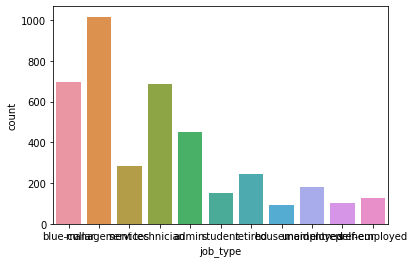

In [72]:
sns.countplot(new_train_test.job_type)

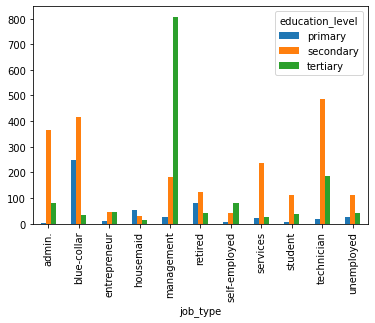

In [73]:
pd.crosstab(new_train_test['job_type'], new_train_test['education_level']).plot(kind='bar')

Since it can be observed that people with different education_level are not restricted to any job types. Thus, education_level is not a good parameter for further prediction, however job_type still has a greater role in the final prediction.

In [74]:
del new_train_test['education_level']
new_train_test.head()

,age,job_type,marital_status,default_or_not,balance_amt,household_insurance,car_loan,no_of_contacts,prev_attempts,source
0,47.000000,blue-collar,married,0,1112.000000,1,0,1,0,train
1,46.031442,management,married,0,1.312372,0,1,3,1,train
2,36.000000,services,single,0,281.000000,1,0,1,0,train
3,32.000000,technician,single,0,540.000000,0,1,1,0,train
4,30.000000,admin.,single,0,315.000000,1,0,3,4,train


In [75]:
# Splitting the data based on source column for train
grouped = new_train_test.groupby(new_train_test.source)
training_data = grouped.get_group("train")
print(training_data.shape)
training_data.tail()

(3102, 10)


,age,job_type,marital_status,default_or_not,balance_amt,household_insurance,car_loan,no_of_contacts,prev_attempts,source
3097,44.0,technician,single,0,78.0,1,0,6,0,train
3098,57.0,admin.,married,0,4168.0,1,1,1,0,train
3099,51.0,entrepreneur,married,0,83.0,0,0,2,0,train
3100,61.0,blue-collar,married,0,5.0,0,0,2,3,train
3101,53.0,technician,married,0,284.0,0,0,1,0,train


In [76]:
# Splitting the data based on source column for test
grouped = new_train_test.groupby(new_train_test.source)
testing_data = grouped.get_group("test")
print(testing_data.shape)
testing_data.tail()

(935, 10)


,age,job_type,marital_status,default_or_not,balance_amt,household_insurance,car_loan,no_of_contacts,prev_attempts,source
4032,31.0,blue-collar,married,0,152.0,1,1,1,0,test
4033,30.0,technician,single,0,53.0,1,0,5,0,test
4034,42.0,management,married,0,36.0,0,0,3,0,test
4035,46.0,services,married,0,2948.0,0,0,1,0,test
4036,54.0,blue-collar,married,0,548.0,0,0,7,0,test


In [77]:
# Deleting the source column from both training and testing data frame, now irrelevant after cleaning and data pre-processing
del training_data['source']
del testing_data['source']

In [78]:
training_data = pd.concat([training_data, target_train], axis=1, join='inner')
training_data.head()

,age,job_type,marital_status,default_or_not,balance_amt,household_insurance,car_loan,no_of_contacts,prev_attempts,car_insurance
0,47.000000,blue-collar,married,0,1112.000000,1,0,1,0,0
1,46.031442,management,married,0,1.312372,0,1,3,1,1
2,36.000000,services,single,0,281.000000,1,0,1,0,1
3,32.000000,technician,single,0,540.000000,0,1,1,0,1
4,30.000000,admin.,single,0,315.000000,1,0,3,4,1


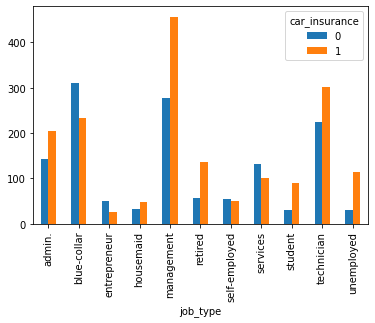

In [79]:
pd.crosstab(training_data['job_type'], training_data['car_insurance']).plot(kind='bar')
plt.show()

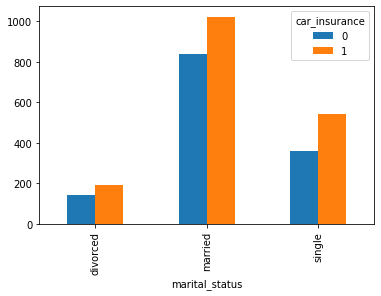

In [80]:
pd.crosstab(training_data['marital_status'], training_data['car_insurance']).plot(kind='bar')
plt.show()

Amongst the categorical variable, marital_status is one of the independent variable.



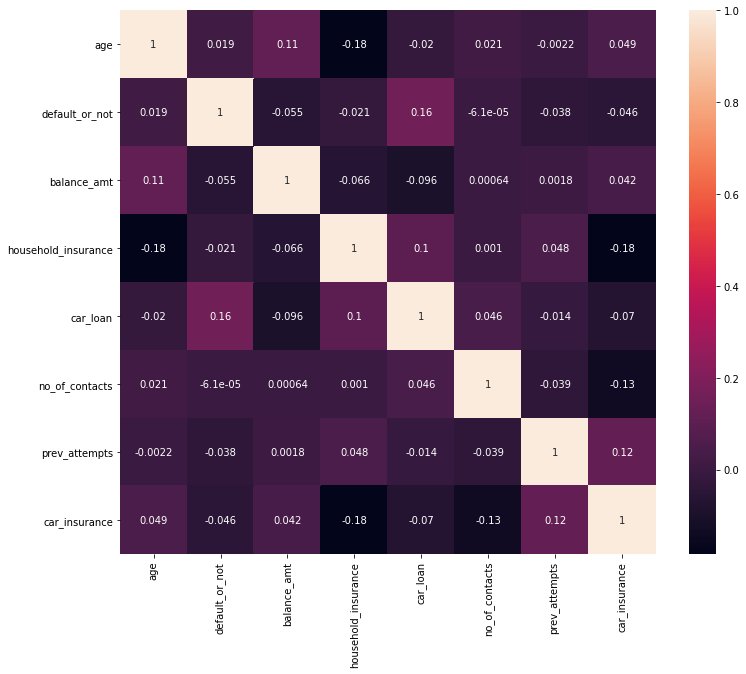

In [81]:
plt.figure(figsize=(12,10))
sns.heatmap(training_data.corr(),annot=True)
plt.show()

It can be observed that there is a high negative correlation amongst variables, hence the independent variable are:


*   default_or_not
*   household_insurance
*   car_loan
*   no_of_contact






In [82]:
# Omit dependent columns
X = training_data[['marital_status','default_or_not','household_insurance','car_loan','no_of_contacts']]
test_X = testing_data[['marital_status','default_or_not','household_insurance','car_loan','no_of_contacts']]
y = training_data['car_insurance']

One Hot Encoding

In [83]:
categorical_column = ['marital_status']
X = pd.get_dummies(X, columns=categorical_column) 
test_X = pd.get_dummies(test_X, columns=categorical_column) 
print(X.shape)
X.tail()

(3102, 7)


,default_or_not,household_insurance,car_loan,no_of_contacts,marital_status_divorced,marital_status_married,marital_status_single
3097,0,1,0,6,0,0,1
3098,0,1,1,1,0,1,0
3099,0,0,0,2,0,1,0
3100,0,0,0,2,0,1,0
3101,0,0,0,1,0,1,0


# Build Machine Learning Model & Evaluate it

In [84]:
# Applying Logistic Regression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=50)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [85]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
prediction = logreg.predict(X_test)
prediction

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,prediction)


0.6079484425349087

In [88]:
# Trying for different models - applying decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
prediction = model.predict(X_test)
accuracy_score(Y_test,prediction)

0.5961331901181526

# Prediction for Test Dataset & Saving Prediction File

Since accuracy of logistic regression is higher than decision tree classifier we chose to predict using logistic regression model.

In [90]:
finalprediction = logreg.predict(test_X)
res = pd.DataFrame(finalprediction)
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')
files.download('prediction_results.csv')